<a href="https://colab.research.google.com/github/Anshuman17092005/Linear-Regression/blob/main/Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problem Statement

The objective of this project is to analyze the factors that affects the insurance expenses and make a linear regression model to predict expenses based on different factors

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
df = pd.read_csv('insurance.csv')

In [136]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


#2. Data Overview

The dataset consist of numericalfeatures such as age,bmi and children and categorical columns such as sex,smoker and region.Expenses is the target variable which represents the total expenses based on the input features.

#3. Target Variable Analysis

<Axes: xlabel='expenses', ylabel='Count'>

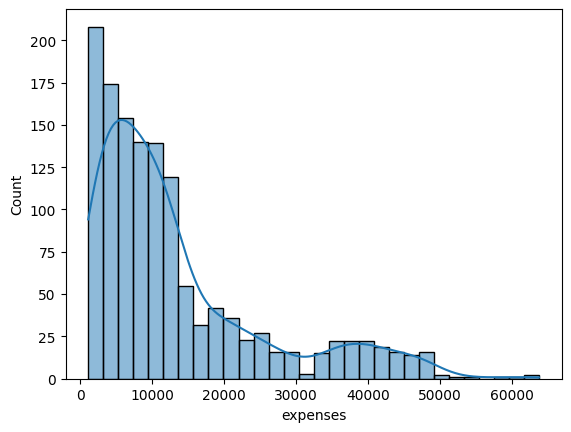

In [137]:
sns.histplot(df['expenses'],kde = True)

The target feature is positively skewed(right skewed).
A long right tail indicates presence of small number of individuals with higher expenses.

# Univariate analysis

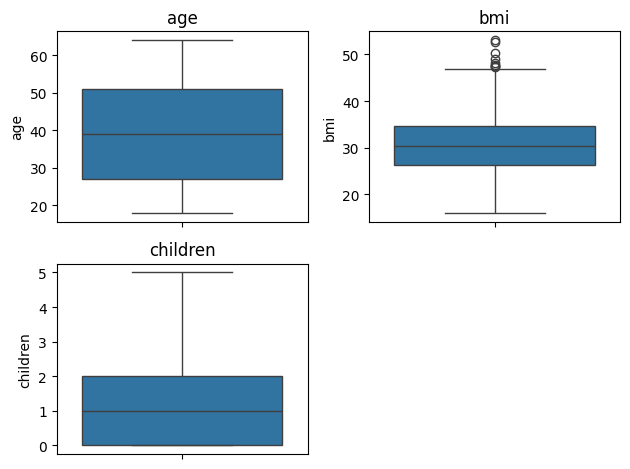

In [138]:
def plotting(col,n):
  plt.subplot(2,2,n)
  sns.boxplot(df[col])
  plt.title(col)
  plt.tight_layout()

plotting('age',1)
plotting('bmi',2)
plotting('children',3)

While minor outliers are present (particularly in BMI), they reflect realistic scenarios and should be retained. The numerical features appear suitable for regression modeling with appropriate scaling or transformation.



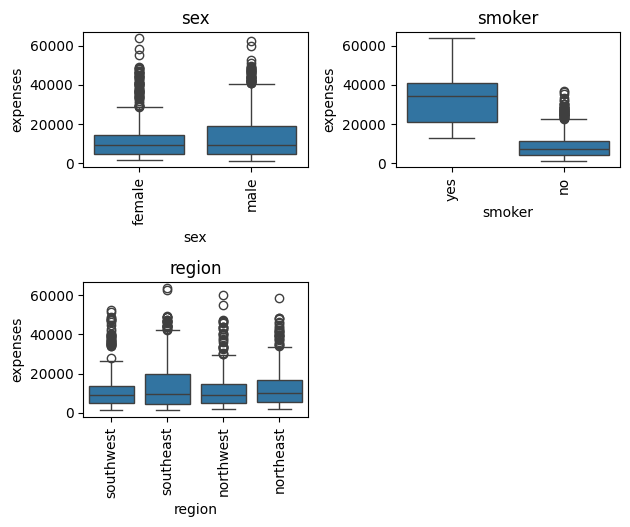

In [139]:
def plotting(col,n):
  plt.subplot(2,2,n)
  sns.boxplot(x = df[col],y = df['expenses'], data = df)
  plt.title(col)
  plt.tight_layout()
  plt.xticks(rotation = 90)

plotting('sex',1)
plotting('smoker',2)
plotting('region',3)

Smoking status shows a strong impact on medical expenses, while gender and region exhibit relatively weaker influence. Although outliers are present, they reflect real-world scenarios and should be retained for modeling.


#Feature to feature relationship

<Axes: >

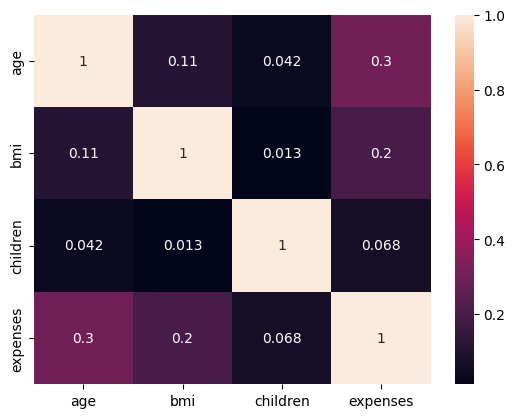

In [140]:
sns.heatmap(df.corr(numeric_only=True),annot = True)

children shows moderate correlation whereas age and bmi are highly correlated.
There is no severe multicollinearity.

<Axes: xlabel='age', ylabel='expenses'>

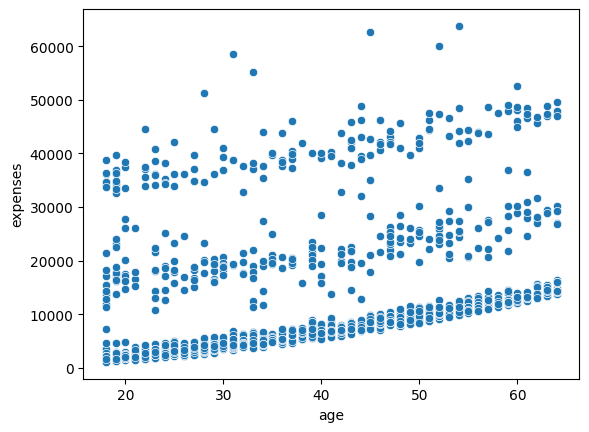

In [141]:
sns.scatterplot(x = 'age',y = 'expenses',data = df)

#Key EDA Insights

*   The target variable is positively distributed.
*   Some features show outliers but they reflect realistic scenarios and should be retained.
* There is no severe multicollinearity.
* Age and bmi has positive impact on expenses.



# Data Preprocessing

In [142]:
df['sex'].value_counts()

,count
sex,
male,676
female,662


In [143]:
df['sex'] = df['sex'].map({'female' : 0,'male' : 1})

In [144]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,southwest,16884.92
1,18,1,33.8,1,no,southeast,1725.55
2,28,1,33.0,3,no,southeast,4449.46
3,33,1,22.7,0,no,northwest,21984.47
4,32,1,28.9,0,no,northwest,3866.86


In [145]:
df['smoker'].value_counts()


,count
smoker,
no,1064
yes,274


In [146]:
df['smoker'] = df['smoker'].map({'yes' : 0,'no' : 1})


In [147]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,0,southwest,16884.92
1,18,1,33.8,1,1,southeast,1725.55
2,28,1,33.0,3,1,southeast,4449.46
3,33,1,22.7,0,1,northwest,21984.47
4,32,1,28.9,0,1,northwest,3866.86


In [148]:
df = pd.get_dummies(df,columns = ['region'],drop_first = True)

In [149]:
df.head()

,age,sex,bmi,children,smoker,expenses,region_northwest,region_southeast,region_southwest
0,19,0,27.9,0,0,16884.92,False,False,True
1,18,1,33.8,1,1,1725.55,False,True,False
2,28,1,33.0,3,1,4449.46,False,True,False
3,33,1,22.7,0,1,21984.47,True,False,False
4,32,1,28.9,0,1,3866.86,True,False,False


In [150]:
df = df.astype(int)

In [151]:
df.head()

,age,sex,bmi,children,smoker,expenses,region_northwest,region_southeast,region_southwest
0,19,0,27,0,0,16884,0,0,1
1,18,1,33,1,1,1725,0,1,0
2,28,1,33,3,1,4449,0,1,0
3,33,1,22,0,1,21984,1,0,0
4,32,1,28,0,1,3866,1,0,0


In [152]:
df['bmi_category'] = pd.cut(
    df['bmi'],
    bins = [0,18.5,24.9,29.9, float('inf')],
    labels = ['underweight','Normal','Overweight','Obese']
)

By categorizing the data, extreme values (e.g., a BMI of 60) are grouped into the "Obese" bucket along with lower values (e.g., 30). This reduces the impact of extreme outliers on the analysis compared to using raw, continuous numbers.

In [153]:
df.head()

,age,sex,bmi,children,smoker,expenses,region_northwest,region_southeast,region_southwest,bmi_category
0,19,0,27,0,0,16884,0,0,1,Overweight
1,18,1,33,1,1,1725,0,1,0,Obese
2,28,1,33,3,1,4449,0,1,0,Obese
3,33,1,22,0,1,21984,1,0,0,Normal
4,32,1,28,0,1,3866,1,0,0,Overweight


In [154]:
df = pd.get_dummies(df,columns = ['bmi_category'],drop_first = True)

In [155]:
df = df.drop('bmi',axis = 1)

In [156]:
df.head()

,age,sex,children,smoker,expenses,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,0,0,0,16884,0,0,1,False,True,False
1,18,1,1,1,1725,0,1,0,False,False,True
2,28,1,3,1,4449,0,1,0,False,False,True
3,33,1,0,1,21984,1,0,0,True,False,False
4,32,1,0,1,3866,1,0,0,False,True,False


In [157]:
df = df.astype(int)

In [158]:
df.head()

,age,sex,children,smoker,expenses,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,0,0,0,16884,0,0,1,0,1,0
1,18,1,1,1,1725,0,1,0,0,0,1
2,28,1,3,1,4449,0,1,0,0,0,1
3,33,1,0,1,21984,1,0,0,1,0,0
4,32,1,0,1,3866,1,0,0,0,1,0


In [159]:
from sklearn.model_selection import train_test_split

In [160]:
X = df.drop('expenses',axis = 1)
y = df['expenses']

In [161]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

#Feature Scaling

In [162]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Model building

In [163]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [164]:
y_baseline = np.full_like(y_test, y_train.mean(), dtype=float)

baseline_mae = mean_absolute_error(y_test, y_baseline)
baseline_rmse = np.sqrt(mean_squared_error(y_test, y_baseline))
baseline_r2 = r2_score(y_test, y_baseline)

baseline_mae, baseline_rmse, baseline_r2

(9593.332473148277, np.float64(12465.600499798908), -0.0009192315073200952)

In [165]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [166]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

coeff_df

,Feature,Coefficient
0,age,3621.002373
9,bmi_category_Obese,2753.440517
8,bmi_category_Overweight,710.355287
2,children,501.997483
7,bmi_category_Normal,199.428613
1,sex,-6.605283
5,region_southeast,-159.296685
4,region_northwest,-197.494953
6,region_southwest,-347.085228
3,smoker,-9555.645734


In [167]:
y_pred = model.predict(X_test)

In [168]:
r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

r2,mae,mse,rmse

(0.7788198880542871,
 4315.966253069756,
 34337877.62796544,
 np.float64(5859.853038085976))

The model explains around 78% of variance with an average error of approximately 4.3k. Higher RMSE compared to MAE suggests sensitivity to high-expense outliers, consistent with the skewed target distribution.

The baseline model predicts the mean expenses for all individuals.
The linear regression model significantly outperforms this baseline, confirming that the learned relationships are meaningful.

In [169]:
train_r2 = model.score(X_train,y_train)
test_r2 = model.score(X_test,y_test)
train_r2,test_r2

(0.7479005698674873, 0.7788198880542871)

The train and test R² scores are close, indicating that the model generalizes well and does not show signs of overfitting.

# Residual Analysis

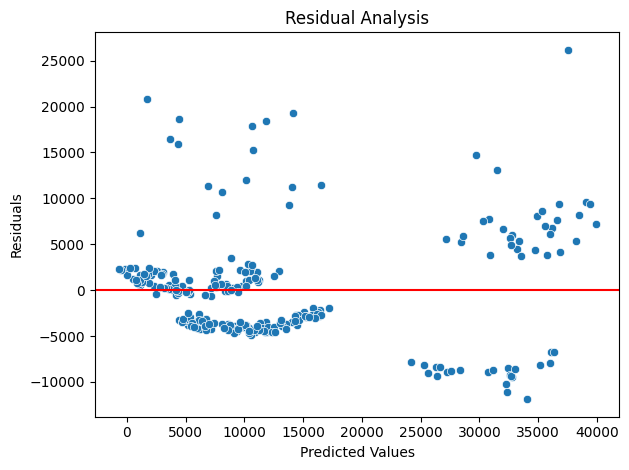

In [170]:
residuals = y_test - y_pred
sns.scatterplot(x = y_pred,y = residuals)
plt.axhline(y = 0,color= 'red')
plt.title('Residual Analysis')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.tight_layout()

While the model captures general trends, violations of linear regression assumptions are present, particularly for high-expense cases.

# Conclusion

This notebook shows complete regression workflow from EDA,preprocessing,modelling and evaluation. The analysis shows that factors such as age,bmi and smoker plays a significant role in predicting the expenses. The linear regression performs well and serves as a strong baseline for future improvements.